In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn

%matplotlib inline

In [2]:
# Importing the important datasets
titanic = pd.read_csv('Dataset/titanic_complete.csv')
train_data = pd.read_csv('Dataset/train.csv')
test_data = pd.read_csv('Dataset/test.csv')

In [3]:
titanic.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0,373450


In [4]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Exploratory Data Analysis

In [6]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1046 non-null   float64
 1   Cabin        295 non-null    object 
 2   Embarked     1307 non-null   object 
 3   Fare         1308 non-null   float64
 4   Name         1309 non-null   object 
 5   Parch        1309 non-null   int64  
 6   PassengerId  1309 non-null   int64  
 7   Pclass       1309 non-null   int64  
 8   Sex          1309 non-null   object 
 9   SibSp        1309 non-null   int64  
 10  Survived     1309 non-null   int64  
 11  Ticket       1309 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 122.8+ KB


In [7]:
titanic.shape

(1309, 12)

In [8]:
titanic.nunique(axis = 0)

Age              98
Cabin           186
Embarked          3
Fare            281
Name           1307
Parch             8
PassengerId    1309
Pclass            3
Sex               2
SibSp             7
Survived          2
Ticket          929
dtype: int64

In [9]:
titanic.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,1046.0,NaN,NaN,NaN,29.881138,14.413493,0.17,21.0,28.0,39.0,80.0
Cabin,295,186,C23 C25 C27,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Embarked,1307,3,S,914,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fare,1308.0,NaN,NaN,NaN,33.295479,51.758668,0.0,7.8958,14.4542,31.275,512.3292
Name,1309,1307,"Connolly, Miss. Kate",2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Parch,1309.0,NaN,NaN,NaN,0.385027,0.86556,0.0,0.0,0.0,0.0,9.0
PassengerId,1309.0,NaN,NaN,NaN,655.0,378.020061,1.0,328.0,655.0,982.0,1309.0
Pclass,1309.0,NaN,NaN,NaN,2.294882,0.837836,1.0,2.0,3.0,3.0,3.0
Sex,1309,2,male,843,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SibSp,1309.0,NaN,NaN,NaN,0.498854,1.041658,0.0,0.0,0.0,1.0,8.0


In [10]:
titanic.isnull().sum()

Age             263
Cabin          1014
Embarked          2
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived          0
Ticket            0
dtype: int64

In [11]:
# Null data-points in Train data set 
[train_data.isnull().sum(),
len(train_data)]

[PassengerId      0
 Survived         0
 Pclass           0
 Name             0
 Sex              0
 Age            177
 SibSp            0
 Parch            0
 Ticket           0
 Fare             0
 Cabin          687
 Embarked         2
 dtype: int64,
 891]

In [12]:
# Null data-points in Test dataset
[test_data.isnull().sum(), len(test_data)]

[PassengerId      0
 Pclass           0
 Name             0
 Sex              0
 Age             86
 SibSp            0
 Parch            0
 Ticket           0
 Fare             1
 Cabin          327
 Embarked         0
 dtype: int64,
 418]

### Sex

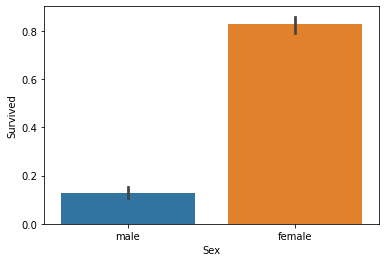

In [13]:
# Who had survived more based on sex?
sbn.barplot(x = 'Sex', y = 'Survived', data = titanic);

In [14]:
# What were the percentage of survival based on sex
male_par = titanic["Survived"][titanic["Sex"] == 'male'].value_counts(normalize = True)[1]*100
print('{:.0f}% of Males who survived'.format(male_par))

female_par = titanic["Survived"][titanic["Sex"] == 'female'].value_counts(normalize = True)[1]*100
print('{:.0f}% of Females who survived'.format(female_par))

13% of Males who survived
83% of Females who survived


In [15]:
# How many male and female were survived?
titanic[['Sex', 'Survived']].groupby(['Sex']).sum()

,Survived
Sex,
female,385
male,109


### Parch

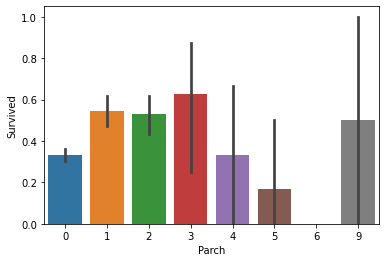

In [16]:
# Who had survived more based on Parch?
sbn.barplot(x = 'Parch', y = 'Survived', data = titanic);

In [17]:
# How many people in each Parch?
titanic[['Parch', 'Survived']].groupby(['Parch']).count()

,Survived
Parch,
0,1002
1,170
2,113
3,8
4,6
5,6
6,2
9,2


In [18]:
# How many people were survived in each parch?
titanic[['Parch', 'Survived']].groupby(['Parch']).sum()

,Survived
Parch,
0,332
1,93
2,60
3,5
4,2
5,1
6,0
9,1


In [19]:
# How many female and male were survived in each parch?
titanic.pivot_table('Survived', index = 'Parch', columns = 'Sex', aggfunc = np.sum)

Sex,female,male
Parch,,
0,252,80
1,74,19
2,50,10
3,5,0
4,2,0
5,1,0
6,0,0
9,1,0


In [20]:
# What were the percentage of people survived in each parch?
for i in titanic.Parch.unique():
        if titanic["Survived"][titanic["Parch"] == i].any() == 0:
            print('0% people survived on Parch {}'.format(i))
        else:
           parch = titanic["Survived"][titanic["Parch"] == i].value_counts(normalize = True)[1]*100
           print('{:.0f}% people survived on Parch {}'.format(parch, i))

33% people survived on Parch 0
55% people survived on Parch 1
53% people survived on Parch 2
17% people survived on Parch 5
62% people survived on Parch 3
33% people survived on Parch 4
0% people survived on Parch 6
50% people survived on Parch 9


### SibSp

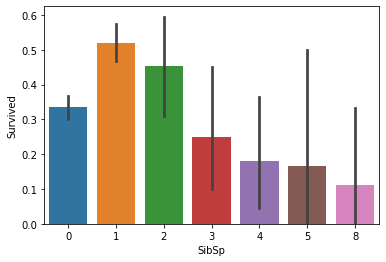

In [21]:
# Who had survived more based on SibSp
sbn.barplot(x = 'SibSp', y = 'Survived', data = titanic);

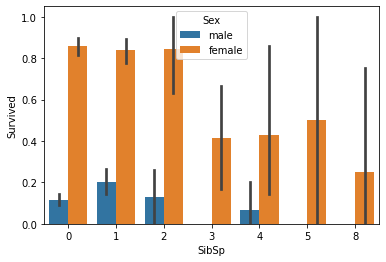

In [22]:
# Which SibSp passengers(male or female) survived more? 
sbn.barplot(x = 'SibSp', y = 'Survived', data = titanic, hue = 'Sex');

In [23]:
# How many passengers they had their SibSp?
titanic[['SibSp', 'Survived']].groupby('SibSp').count()

,Survived
SibSp,
0,891
1,319
2,42
3,20
4,22
5,6
8,9


In [24]:
# How many passengers survived their SibSp?
titanic[['SibSp', 'Survived']].groupby('SibSp').sum()

,Survived
SibSp,
0,298
1,166
2,19
3,5
4,4
5,1
8,1


In [25]:
# How many male or female passemgers survived in SibSp?
titanic.pivot_table('Survived', index = 'SibSp', columns = 'Sex', aggfunc = np.sum)

Sex,female,male
SibSp,,
0,225,73
1,134,32
2,16,3
3,5,0
4,3,1
5,1,0
8,1,0


In [26]:
# What were the percentage of people survived in SibSp?
for i in titanic.SibSp.unique():
        if titanic["Survived"][titanic["SibSp"] == i].any() == 0:
            print('0% people survived on SibSp {}'.format(i))
        else:
           sibsp = titanic["Survived"][titanic["SibSp"] == i].value_counts(normalize = True)[1]*100
           print('{:.0f}% people survived on SibSp {}'.format(sibsp, i))

52% people survived on SibSp 1
33% people survived on SibSp 0
25% people survived on SibSp 3
18% people survived on SibSp 4
45% people survived on SibSp 2
17% people survived on SibSp 5
11% people survived on SibSp 8


### Family Size = SibSp + Parch + 1

In [27]:
titanic['Family_Size'] = titanic['SibSp'] + titanic['Parch'] + 1

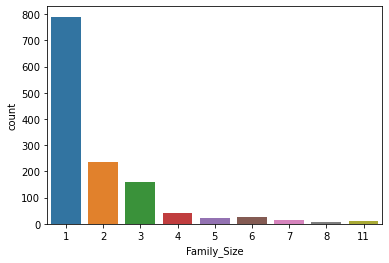

In [28]:
sbn.countplot(x = 'Family_Size', data = titanic);

In [29]:
# What were the percentage of people survived in SibSp?
for i in titanic.Family_Size.unique():
        if titanic["Survived"][titanic["Family_Size"] == i].any() == 0:
            print('0% people survived on Family Size {}'.format(i))
        else:
           fs = titanic["Survived"][titanic["Family_Size"] == i].value_counts(normalize = True)[1]*100
           print('{:.0f}% people survived on Family Size {}'.format(fs, i))

53% people survived on Family Size 2
29% people survived on Family Size 1
23% people survived on Family Size 5
56% people survived on Family Size 3
31% people survived on Family Size 7
20% people survived on Family Size 6
72% people survived on Family Size 4
12% people survived on Family Size 8
18% people survived on Family Size 11


### Pclass

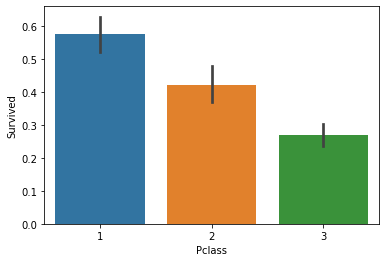

In [30]:
# Who had survived more based on Pclass
sbn.barplot(x = 'Pclass', y = 'Survived', data = titanic);

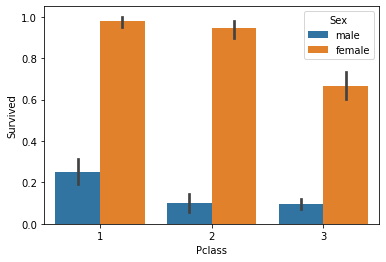

In [31]:
# Which Pclass passenges(male or female) survived more
sbn.barplot(x = 'Pclass', y = 'Survived', data = titanic, hue = 'Sex');

In [32]:
# How many passengers in each Pclass?
titanic[['Pclass', 'Survived']].groupby('Pclass').count()

,Survived
Pclass,
1,323
2,277
3,709


In [33]:
# How many passengers survived in each Pclass?
titanic[['Pclass', 'Survived']].groupby('Pclass').sum()

,Survived
Pclass,
1,186
2,117
3,191


In [34]:
# How many male or female passemgers survived in each Pclass?
titanic.pivot_table('Survived', index = 'Pclass', columns = 'Sex', aggfunc = np.sum)

Sex,female,male
Pclass,,
1,141,45
2,100,17
3,144,47


In [35]:
# What were the percentage of people survived in each Pclass?
for i in titanic.Pclass.unique():
        if titanic["Survived"][titanic["Pclass"] == i].any() == 0:
            print('0% people survived on Pclass {}'.format(i))
        else:
           pclass = titanic["Survived"][titanic["Pclass"] == i].value_counts(normalize = True)[1]*100
           print('{:.0f}% people survived on Pclass {}'.format(pclass, i))

27% people survived on Pclass 3
58% people survived on Pclass 1
42% people survived on Pclass 2


In [36]:
# How many male or female passengers survived in each Pclass based on Parch?
titanic.pivot_table('Survived', index = 'Pclass', columns = ['Parch', 'Sex'], aggfunc = np.sum, )

Parch       0            1           2           3           4           5  \
Sex    female  male female male female male female male female male female   
Pclass                                                                       
1        96.0  36.0   29.0  4.0   14.0  5.0    1.0  0.0    1.0  0.0    NaN   
2        56.0   8.0   23.0  7.0   18.0  2.0    3.0  NaN    NaN  NaN    NaN   
3       100.0  36.0   22.0  8.0   18.0  3.0    1.0  0.0    1.0  0.0    1.0   

Parch            6           9       
Sex    male female male female male  
Pclass                               
1       NaN    NaN  NaN    NaN  NaN  
2       NaN    NaN  NaN    NaN  NaN  
3       0.0    0.0  0.0    1.0  0.0

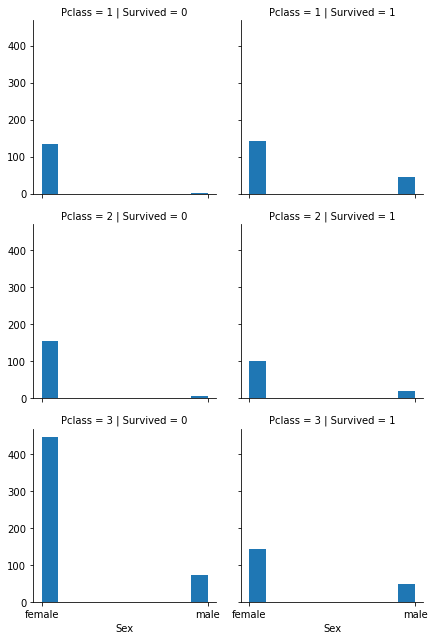

In [37]:
fgrid = sbn.FacetGrid(titanic, col = 'Survived', row = 'Pclass')
fgrid.map(plt.hist, 'Sex')
fgrid.add_legend();

In [38]:
# How many passengers survived in each Pclass,Parch based on SibSp?
titanic.pivot_table('Survived', index = ['Pclass', 'Parch'], columns = 'SibSp', aggfunc = np.sum, )

SibSp             0     1    2    3    4    5    8
Pclass Parch                                      
1      0       76.0  52.0  4.0  NaN  NaN  NaN  NaN
       1       19.0  14.0  NaN  NaN  NaN  NaN  NaN
       2        8.0   6.0  2.0  3.0  NaN  NaN  NaN
       3        NaN   1.0  NaN  NaN  NaN  NaN  NaN
       4        NaN   1.0  NaN  NaN  NaN  NaN  NaN
2      0       46.0  17.0  0.0  1.0  NaN  NaN  NaN
       1        8.0  17.0  5.0  NaN  NaN  NaN  NaN
       2       11.0   9.0  NaN  NaN  NaN  NaN  NaN
       3        1.0   1.0  1.0  NaN  NaN  NaN  NaN
3      0      109.0  22.0  4.0  1.0  NaN  NaN  NaN
       1        7.0  20.0  3.0  0.0  0.0  NaN  NaN
       2       11.0   4.0  0.0  0.0  4.0  1.0  1.0
       3        1.0   0.0  NaN  NaN  NaN  NaN  NaN
       4        1.0   0.0  NaN  NaN  NaN  NaN  NaN
       5        0.0   1.0  NaN  NaN  NaN  NaN  NaN
       6        NaN   0.0  NaN  NaN  NaN  NaN  NaN
       9        NaN   1.0  NaN  NaN  NaN  NaN  NaN

### Embarked 
##### Southampton (S), Cherbourg (C) and Queenstown (Q)

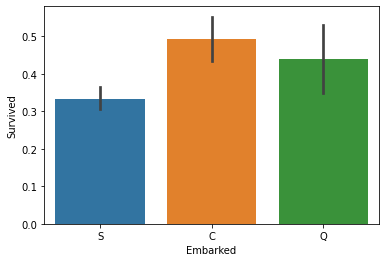

In [39]:
# Passengers survived on the basis of Embarked?
sbn.barplot(x = 'Embarked', y = 'Survived', data = titanic);

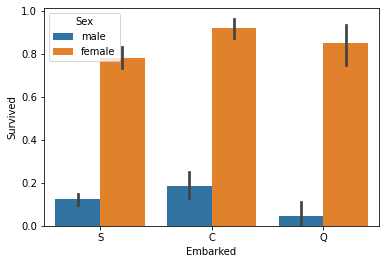

In [40]:
# Passengers(Male, Female) survived on the basis of Embarked?
sbn.barplot(x = 'Embarked', y = 'Survived', data = titanic, hue = 'Sex');

In [41]:
# Total Passengers in Each Embarked
titanic[['Survived', 'Embarked']].groupby('Embarked').count()

,Survived
Embarked,
C,270
Q,123
S,914


In [42]:
# Passengers survived in each embarked
titanic[['Survived', 'Embarked']].groupby('Embarked').sum()

,Survived
Embarked,
C,133
Q,54
S,305


In [43]:
# What were the percentage of people survived in each Embarked?
for i in titanic.Embarked.unique():
        if titanic["Survived"][titanic["Embarked"] == i].any() == 0:
            print('0% people survived on Embarked {}'.format(i))
        else:
           embarked = titanic["Survived"][titanic["Embarked"] == i].value_counts(normalize = True)[1]*100
           print('{:.0f}% people survived on Embarked {}'.format(embarked, i))

33% people survived on Embarked S
49% people survived on Embarked C
44% people survived on Embarked Q
0% people survived on Embarked nan


In [44]:
# Missing People Details based on Embarked
titanic.loc[titanic['Embarked'].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Family_Size
61,38.0,B28,NaN,80.0,"Icard, Miss. Amelie",0,62,1,female,0,1,113572,1
829,62.0,B28,NaN,80.0,"Stone, Mrs. George Nelson (Martha Evelyn)",0,830,1,female,0,1,113572,1


In [45]:
# Male or Female Passengers on the basis of Embarked 
titanic.pivot_table('Survived', index = 'Embarked', columns = 'Sex', aggfunc = np.sum)

Sex,female,male
Embarked,,
C,104,29
Q,51,3
S,228,77


In [46]:
# Male or Female Passengers on the basis of Embarked in each Pclass
titanic.pivot_table('Survived', index = ['Embarked', 'Pclass'], columns = 'Sex', aggfunc = np.sum)

Sex              female  male
Embarked Pclass              
C        1           70    17
         2           11     2
         3           23    10
Q        1            2     0
         2            2     0
         3           47     3
S        1           67    28
         2           87    15
         3           74    34

In [47]:
# Male or Female Passengers on the basis of Embarked, Parch in each Pclass
titanic.pivot_table('Survived', index = ['Embarked', 'Pclass'], columns = ['Sex', 'Parch'], aggfunc = np.sum)

Sex             female                                       male            \
Parch                0     1     2    3    4    5    6    9     0    1    2   
Embarked Pclass                                                               
C        1        49.0  16.0   4.0  1.0  NaN  NaN  NaN  NaN  13.0  3.0  1.0   
         2         7.0   1.0   3.0  NaN  NaN  NaN  NaN  NaN   1.0  0.0  1.0   
         3        10.0   8.0   4.0  1.0  NaN  NaN  NaN  NaN   6.0  4.0  0.0   
Q        1         2.0   NaN   NaN  NaN  NaN  NaN  NaN  NaN   0.0  NaN  NaN   
         2         2.0   NaN   NaN  NaN  NaN  NaN  NaN  NaN   0.0  NaN  NaN   
         3        47.0   0.0   0.0  NaN  NaN  0.0  NaN  NaN   3.0  0.0  NaN   
S        1        43.0  13.0  10.0  NaN  1.0  NaN  NaN  NaN  23.0  1.0  4.0   
         2        47.0  22.0  15.0  3.0  NaN  NaN  NaN  NaN   7.0  7.0  1.0   
         3        43.0  14.0  14.0  0.0  1.0  1.0  0.0  1.0  27.0  4.0  3.0   

Sex                                       
Parch              3    4    5    6    9  
Embarked Pclass                           
C        1       0.0  NaN  NaN  NaN  NaN  
         2       NaN  NaN  NaN  NaN  NaN  
         3       NaN  NaN  NaN  NaN  NaN  
Q        1       NaN  NaN  NaN  NaN  NaN  
         2       NaN  NaN  NaN  NaN  NaN  
         3       NaN  NaN  NaN  NaN  NaN  
S        1       NaN  0.0  NaN  NaN  NaN  
         2       NaN  NaN  NaN  NaN  NaN  
         3       0.0  0.0  0.0  0.0  0.0

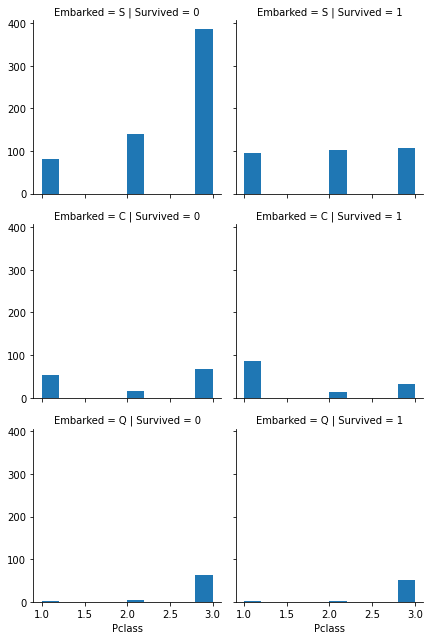

In [48]:
fgrid = sbn.FacetGrid(titanic, row = 'Embarked', col = 'Survived')
fgrid.map(plt.hist, 'Pclass')
fgrid.add_legend();

### Cabin

In [49]:
titanic['Cabin'].count()

295

In [50]:
titanic['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [51]:
print('There are {} different values for Cabin and {} missing'.format(str(titanic['Cabin'].nunique()), str(titanic['Cabin'].isnull().sum())))

There are 186 different values for Cabin and 1014 missing


In [52]:
# Keeping all the first letters of Cabin in a new variable and using 'M' for each missing
titanic['Deck'] = titanic['Cabin'].apply(lambda m: m[0] if pd.notnull(m) else 'M')

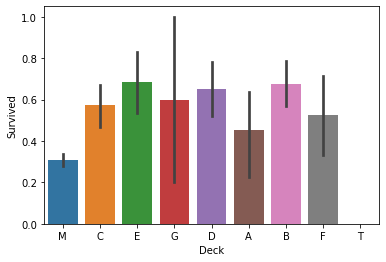

In [53]:
sbn.barplot(x = 'Deck', y = 'Survived', data = titanic);

In [54]:
# Total Passengers survived in each Deck
titanic[['Survived', 'Deck']].groupby('Deck').count()

,Survived
Deck,
A,22
B,65
C,94
D,46
E,41
F,21
G,5
M,1014
T,1


In [55]:
# Passengers survived in each cabin set
titanic[['Survived', 'Deck']].groupby('Deck').sum()

,Survived
Deck,
A,10
B,44
C,54
D,30
E,28
F,11
G,3
M,314
T,0


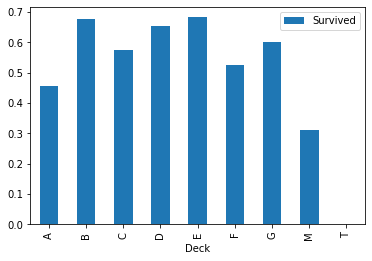

In [56]:
# Passengers survived in each cabin set
titanic[['Survived', 'Deck']].groupby('Deck').mean().plot(kind = 'bar');

In [57]:
# What were the percentage of passengers survived in each Deck(Cabin)?
for i in titanic.Deck.unique():
        if titanic["Survived"][titanic["Deck"] == i].any() == 0:
            print('0% people survived on Deck {}'.format(i))
        else:
            deck = titanic["Survived"][titanic["Deck"] == i].value_counts(normalize = True)[1]*100
            print('{:.0f}% people survived on Deck {}'.format(deck, i))

31% people survived on Deck M
57% people survived on Deck C
68% people survived on Deck E
60% people survived on Deck G
65% people survived on Deck D
45% people survived on Deck A
68% people survived on Deck B
52% people survived on Deck F
0% people survived on Deck T


In [58]:
# Grouping the Deck
titanic['Deck'] = titanic['Deck'].replace(['A', 'B', 'C', 'T'], 'ABC')
titanic['Deck'] = titanic['Deck'].replace(['D', 'E'], 'DE')
titanic['Deck'] = titanic['Deck'].replace(['F', 'G'], 'FG')

In [59]:
titanic['Deck'].value_counts()

M      1014
ABC     182
DE       87
FG       26
Name: Deck, dtype: int64

In [60]:
titanic.pivot_table('Survived', index = 'Pclass', columns = 'Deck', aggfunc = np.sum)

Deck,ABC,DE,FG,M
Pclass,,,,
1,108.0,49.0,NaN,29.0
2,NaN,6.0,10.0,101.0
3,NaN,3.0,4.0,184.0


In [61]:
titanic.pivot_table('Survived', index = 'Embarked', columns = 'Deck', aggfunc = np.sum)

Deck,ABC,DE,FG,M
Embarked,,,,
C,52,21,1,59
Q,2,1,0,51
S,52,36,13,204


In [62]:
# Missing passengers Details based on Cabin
titanic.loc[titanic['Cabin'].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Family_Size,Deck
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0,A/5 21171,2,M
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1,STON/O2. 3101282,1,M
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0,373450,1,M
5,NaN,NaN,Q,8.4583,"Moran, Mr. James",0,6,3,male,0,0,330877,1,M
7,2.0,NaN,S,21.0750,"Palsson, Master. Gosta Leonard",1,8,3,male,3,0,349909,5,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1303,28.0,NaN,S,7.7750,"Henriksson, Miss. Jenny Lovisa",0,1304,3,female,0,1,347086,1,M
1304,NaN,NaN,S,8.0500,"Spector, Mr. Woolf",0,1305,3,male,0,0,A.5. 3236,1,M
1306,38.5,NaN,S,7.2500,"Saether, Mr. Simon Sivertsen",0,1307,3,male,0,0,SOTON/O.Q. 3101262,1,M
1307,NaN,NaN,S,8.0500,"Ware, Mr. Frederick",0,1308,3,male,0,0,359309,1,M


In [63]:
# Missing passengers Details based on Cabin and Embarked
titanic.loc[titanic['Cabin'].isnull() & titanic['Embarked'].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Family_Size,Deck


### Fare 

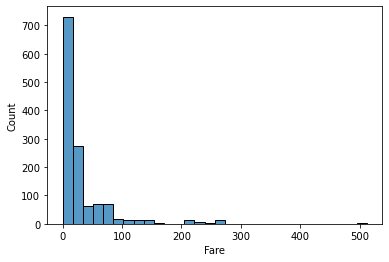

In [64]:
sbn.histplot(x = 'Fare', data = titanic, bins = 30);

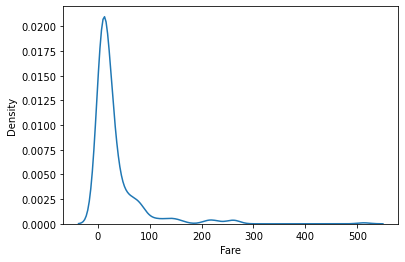

In [65]:
sbn.kdeplot(x = 'Fare', data = titanic);

In [66]:
# Skewness of Fare 
print("Skewness in Fare : {0:.2f}".format(train_data.Fare.skew()))

Skewness in Fare : 4.79


In [67]:
print('Mean Fare : {}'.format(train_data.Fare.mean())) # MeanFare
print('Meadian Fare : {}'.format(train_data.Fare.median())) # Median Fare
print('Minimum Fare : {}'.format(train_data.Fare.min())) # Minimum Fare
print('Maximum Fare : {}'.format(train_data.Fare.max())) # Maximum Fare
print('Fare Range : {}'.format(train_data.Fare.max() - train_data.Fare.min())) # Fare Range
print('25% : {}'.format(train_data.Fare.quantile(.25))) # 25 %
print('50% : {}'.format(train_data.Fare.quantile(.5))) # 50%
print('75% : {}'.format(train_data.Fare.quantile(.75))) # 75%
print('Variance Fare : {}'.format(train_data.Fare.var())) # Variance
print('Standard Deviation Fare : {}'.format(train_data.Fare.std())) # Standard Deviation

Mean Fare : 32.2042079685746
Meadian Fare : 14.4542
Minimum Fare : 0.0
Maximum Fare : 512.3292
Fare Range : 512.3292
25% : 7.9104
50% : 14.4542
75% : 31.0
Variance Fare : 2469.436845743117
Standard Deviation Fare : 49.693428597180905


In [68]:
titanic.loc[titanic['Fare'].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Family_Size,Deck
1043,60.5,NaN,S,NaN,"Storey, Mr. Thomas",0,1044,3,male,0,0,3701,1,M


In [69]:
# Average fare based on the passenger class
titanic.groupby(['Pclass', 'Embarked', 'Deck']).Fare.median()

Pclass  Embarked  Deck
1       C         ABC     81.17915
                  DE      76.72920
                  M       59.40000
        Q         ABC     90.00000
        S         ABC     71.00000
                  DE      51.86250
                  M       30.50000
2       C         DE      13.82710
                  M       24.00000
        Q         DE      12.35000
                  M       12.35000
        S         DE      13.00000
                  FG      26.00000
                  M       15.87500
3       C         FG       7.22920
                  M        7.89580
        Q         FG       7.75000
                  M        7.75000
        S         DE      12.47500
                  FG      10.46250
                  M        8.05000
Name: Fare, dtype: float64

### Age 

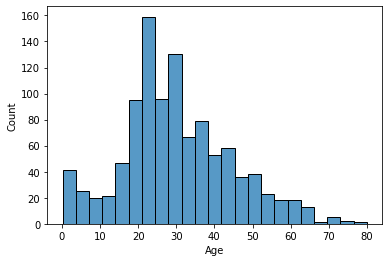

In [70]:
sbn.histplot(x = 'Age', data = titanic);

In [71]:
# Skewness in Age on entire dataset
print('Skewness in Age : {0:.2f}'.format(titanic.Age.skew()))

Skewness in Age : 0.41


In [72]:
# how much missing data in age feature?
print('Missing entry for Age in entire titanic dataset are {} out of {}.'.format(titanic['Age'].isnull().sum(), len(titanic)))
print('Missing percentage {:.0f}%'.format(titanic['Age'].isnull().sum()/len(titanic)*100))

Missing entry for Age in entire titanic dataset are 263 out of 1309.
Missing percentage 20%


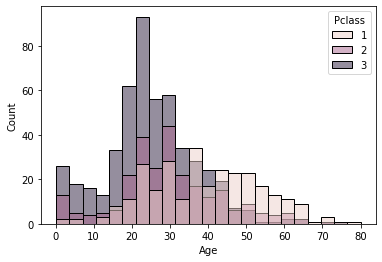

In [73]:
sbn.histplot(x = 'Age', data = titanic, hue = 'Pclass');

In [74]:
# Median Age based on the passenger class
titanic.groupby(['Pclass']).Age.median()

Pclass
1    39.0
2    29.0
3    24.0
Name: Age, dtype: float64

In [75]:
# Median Age based on the passenger class and Sex
titanic.groupby(['Pclass', 'Sex']).Age.median()

Pclass  Sex   
1       female    36.0
        male      42.0
2       female    28.0
        male      29.5
3       female    22.0
        male      25.0
Name: Age, dtype: float64

In [76]:
# Total passenger in each Pclass
titanic.groupby(['Pclass', 'Sex']).Age.count()

Pclass  Sex   
1       female    133
        male      151
2       female    103
        male      158
3       female    152
        male      349
Name: Age, dtype: int64

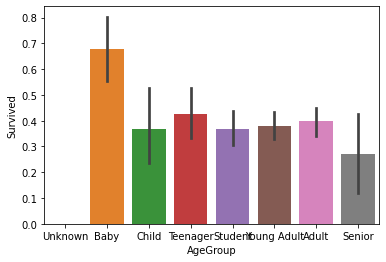

In [77]:
titanic['Age'] = titanic['Age'].fillna(-1)
bins = [-1, 0, 5, 12, 18, 24, 35, 60, np.inf]
labels = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
titanic['AgeGroup'] = pd.cut(titanic['Age'], bins, labels = labels)

sbn.barplot(x = 'AgeGroup', y = 'Survived', data = titanic);

### Ticket 

In [78]:
titanic['Ticket_Frequency'] = titanic.groupby('Ticket')['Ticket'].transform('count')

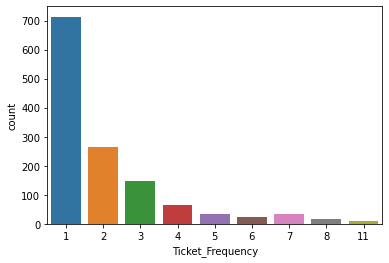

In [79]:
sbn.countplot(x = 'Ticket_Frequency', data = titanic);

In [80]:
titanic[['Ticket_Frequency', 'Survived']].groupby('Ticket_Frequency').sum()

,Survived
Ticket_Frequency,
1,186
2,137
3,88
4,47
5,12
6,7
7,9
8,6
11,2


In [81]:
titanic[['Ticket_Frequency', 'Survived']].groupby('Ticket_Frequency').mean()

,Survived
Ticket_Frequency,
1,0.260870
2,0.518939
3,0.598639
4,0.734375
5,0.342857
6,0.291667
7,0.257143
8,0.375000
11,0.181818


In [82]:
titanic.columns

Index(['Age', 'Cabin', 'Embarked', 'Fare', 'Name', 'Parch', 'PassengerId',
       'Pclass', 'Sex', 'SibSp', 'Survived', 'Ticket', 'Family_Size', 'Deck',
       'AgeGroup', 'Ticket_Frequency'],
      dtype='object')

In [83]:
# Exporting the Complete Dataset after EDA
full_data.to_csv('Dataset/titanic_complete.csv', index = False)('Dataset/titanic_complete_after_eda.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'Dataset/titanic_complete_after_eda.csv'